<p style="text-align:center"><img src="https://i.imgur.com/kwgnmDy.png"></p>


<h1 style="text-align:center;background-color:lightblue;border-radius: 100px;">Objective:</h1>

> The goal of this competition is to recreate John Snow's analysis of cholera deaths, using modern GIS tools/Python.
<p style="text-align:center"><img src="https://i.pinimg.com/originals/e0/85/ca/e085ca8180faad7a93ab2a0641983c9f.jpg"></p>

> More specifically, the goal is to count all reported cholera deaths, within 50 m of a water pump. In this way, we will be able to identify which water pumps pose a danger to public health.
> 
> This notebook will show the glimpse of Analysis done by John Snow.
> 
> And at last ,create a sample.csv file for submission.

<h1 style="text-align:center;background-color:lightblue;border-radius: 100px;">Libraries Used / Data preparation:</h1>

In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cholera-deaths/polys.shp
/kaggle/input/cholera-deaths/polys.prj
/kaggle/input/cholera-deaths/Pumps.shx
/kaggle/input/cholera-deaths/Pumps.shp
/kaggle/input/cholera-deaths/Cholera_Deaths.shp
/kaggle/input/cholera-deaths/sample.csv
/kaggle/input/cholera-deaths/Pumps.prj
/kaggle/input/cholera-deaths/polys.dbf
/kaggle/input/cholera-deaths/Cholera_Deaths.dbf
/kaggle/input/cholera-deaths/Cholera_Deaths.prj
/kaggle/input/cholera-deaths/Pumps.dbf
/kaggle/input/cholera-deaths/SnowDSM50CM.tif
/kaggle/input/cholera-deaths/Cholera_Deaths.sbx
/kaggle/input/cholera-deaths/polys.cpg
/kaggle/input/cholera-deaths/Cholera_Deaths.shx
/kaggle/input/cholera-deaths/Pumps.sbx
/kaggle/input/cholera-deaths/polys.shx
/kaggle/input/cholera-deaths/Cholera_Deaths.sbn
/kaggle/input/cholera-deaths/SnowMap.tif


In [116]:
#import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
import seaborn as sns
import geopandas as gdf
from shapely.geometry import Point, LineString, Polygon

### Create Dataframes from 3 shp file belonging to Deaths,Pumps and MAP's Geographical shape

In [117]:
#shape file where the cholera death happened
deaths = gdf.read_file('../input/cholera-deaths/Cholera_Deaths.shp')
deaths

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.380 181014.259)
4,0,4,POINT (529320.675 181007.872)
...,...,...,...
245,0,3,POINT (529362.665 181156.058)
246,0,2,POINT (529365.152 181176.129)
247,0,1,POINT (529274.165 180907.313)
248,0,1,POINT (529299.361 180873.185)


In [118]:
#shape file of map
poly_map = gdf.read_file('../input/cholera-deaths/polys.shp') #shape of map
poly_map

,featcode,Deaths,Death_dens,ID,geometry
0,15014.0,31.0,0.007627,0D4F7075050927B3E050A00A568A259B,"POLYGON ((529430.090 180971.910, 529478.950 18..."
1,15014.0,29.0,0.005447,0D4F7075061927B3E050A00A568A259B,"POLYGON ((529435.090 180978.330, 529466.980 18..."
2,15014.0,0.0,0.000000,0D4F7075050B27B3E050A00A568A259B,"POLYGON ((529582.350 180931.550, 529587.250 18..."
3,15014.0,0.0,0.000000,0D4F7075050D27B3E050A00A568A259B,"POLYGON ((529616.500 180947.050, 529608.900 18..."
4,15014.0,3.0,0.069249,0D4F7075050A27B3E050A00A568A259B,"POLYGON ((529531.760 180952.190, 529533.450 18..."
5,15014.0,3.0,0.006216,0D4F7073E95927B3E050A00A568A259B,"POLYGON ((529509.500 180943.530, 529499.740 18..."
6,15014.0,3.0,0.001228,0D4F7075061C27B3E050A00A568A259B,"POLYGON ((529638.730 180976.380, 529631.320 18..."
7,15014.0,3.0,0.001983,0D4F70743EF127B3E050A00A568A259B,"POLYGON ((529512.420 181049.180, 529560.550 18..."
8,15014.0,8.0,0.016564,0D4F70743EF027B3E050A00A568A259B,"POLYGON ((529500.740 181000.220, 529512.420 18..."
9,15014.0,27.0,0.005788,0D4F7075061B27B3E050A00A568A259B,"POLYGON ((529543.850 181103.350, 529598.650 18..."


In [119]:
poly_map["Deaths"].sum() #show how much death happened 

489.0

In [120]:
# ../input/cholera-deaths/Pumps.shp

#Pump location on map
pump= gdf.read_file('../input/cholera-deaths/Pumps.shp')
pump

,Id,geometry
0,1,POINT (529396.539 181025.063)
1,2,POINT (529192.538 181079.391)
2,3,POINT (529183.740 181193.735)
3,4,POINT (529748.911 180924.207)
4,5,POINT (529613.205 180896.804)
5,6,POINT (529453.586 180826.353)
6,7,POINT (529593.727 180660.455)
7,8,POINT (529296.104 180794.849)


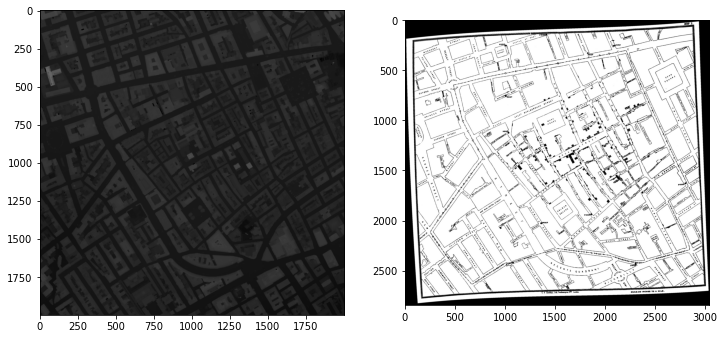

In [121]:
# Overview of map as per the elevation:
import matplotlib.pyplot as plt
img1 = plt.imread('../input/cholera-deaths/SnowDSM50CM.tif')
img2 = plt.imread('../input/cholera-deaths/SnowMap.tif')
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)

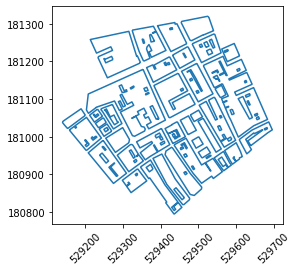

In [122]:
# Boundary of map for anaysis 
poly_map.boundary.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

(529111.4625, 529723.8875000001, 180768.9045, 181346.08550000002)

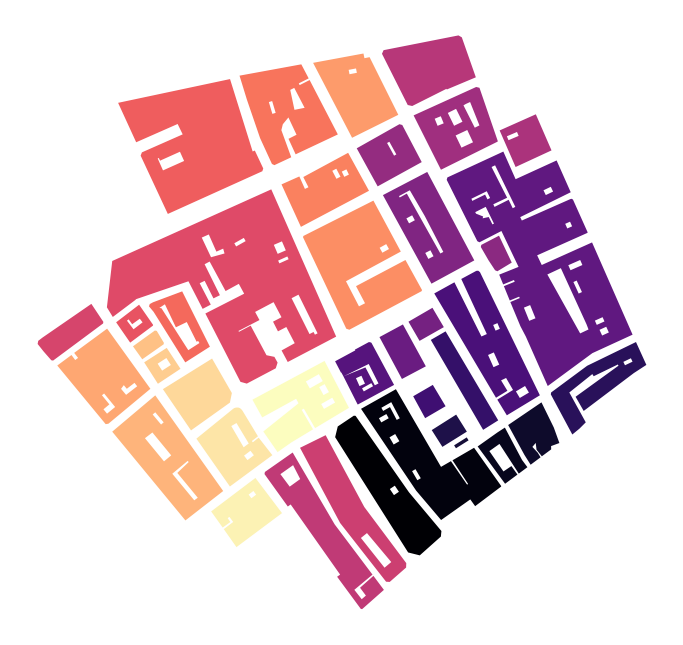

In [123]:
poly_map.plot(cmap='magma', figsize=(12, 12)) #showing the colourful map
plt.axis('off')

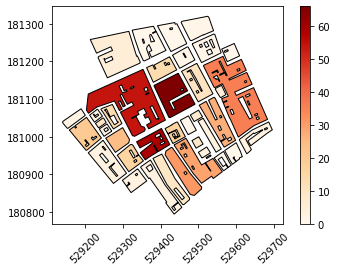

In [124]:
# We use a PySAL example shapefile
import libpysal as ps

tracts = gdf.GeoDataFrame.from_file("../input/cholera-deaths/polys.shp")
tracts.plot(column='Deaths', cmap='OrRd', edgecolor='k', legend=True)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

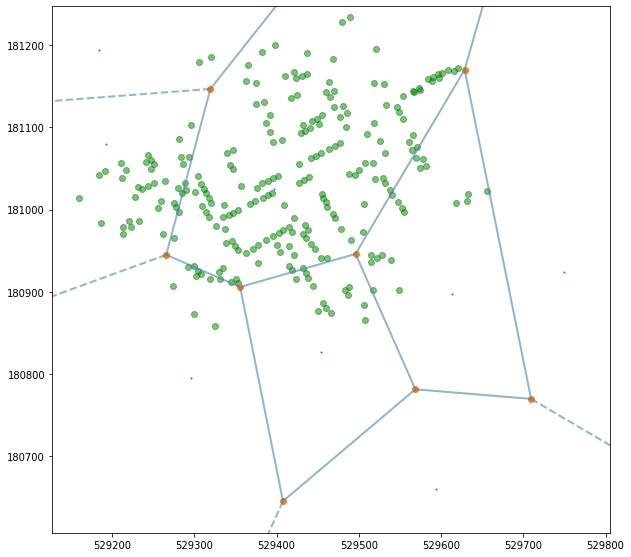

In [125]:
#voronoi charts coveering deaths using Pumps in map
points=np.array([[i.x,i.y] for i in pump.geometry])
from scipy.spatial import Voronoi, voronoi_plot_2d

fig, ax = plt.subplots(1,1,figsize=(10, 10))
vor = Voronoi(points)
deaths.plot(color='green', alpha=.5,label="deaths",ax=ax )
voronoi_plot_2d(vor, show_vertices=True, line_colors='steelblue',
                line_width=2, line_alpha=0.6, point_size=2,ax=ax)

plt.show()

#Handpump covering areas where deaths happened.

### Plot of Point related to deaths and Pumps situated on Maps 

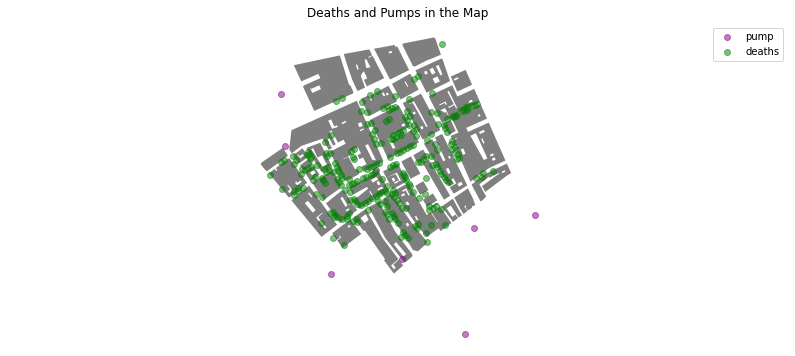

In [126]:
fig, ax = plt.subplots(figsize=(14,6))

poly_map.plot(alpha = .5, ax = ax,color="black")
f1=pump.plot(color='purple', ax=ax, alpha=.5,label="pump")
f2=deaths.plot(color='green', ax=ax, alpha=.5,label="deaths")

ax.set(title='Deaths and Pumps in the Map')
ax.set_axis_off()
ax.legend(loc ="upper right");
plt.axis('equal')

plt.show()

### Creating Buffers of 50 meters round Point.

In [127]:
# Circle (using a buffer around a point)
# point = Point((0,0))
# point.buffer(1)
pump["buffer_geometry"]=pump["geometry"].buffer(50);pump

,Id,geometry,buffer_geometry
0,1,POINT (529396.539 181025.063),"POLYGON ((529446.539 181025.063, 529446.299 18..."
1,2,POINT (529192.538 181079.391),"POLYGON ((529242.538 181079.391, 529242.297 18..."
2,3,POINT (529183.740 181193.735),"POLYGON ((529233.740 181193.735, 529233.499 18..."
3,4,POINT (529748.911 180924.207),"POLYGON ((529798.911 180924.207, 529798.670 18..."
4,5,POINT (529613.205 180896.804),"POLYGON ((529663.205 180896.804, 529662.964 18..."
5,6,POINT (529453.586 180826.353),"POLYGON ((529503.586 180826.353, 529503.345 18..."
6,7,POINT (529593.727 180660.455),"POLYGON ((529643.727 180660.455, 529643.486 18..."
7,8,POINT (529296.104 180794.849),"POLYGON ((529346.104 180794.849, 529345.864 18..."


### Ploting 50 meter buffer around Pumps along with Deaths. 

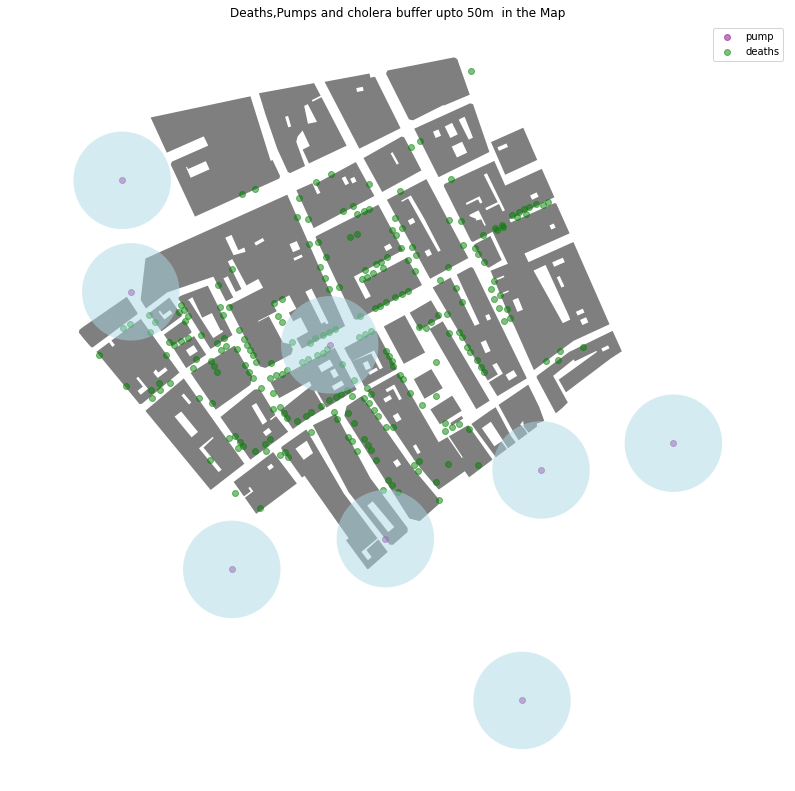

In [128]:
fig, ax = plt.subplots(figsize=(14,14))

poly_map.plot(alpha = .5, ax = ax,color="black")
f1=pump[["geometry"]].plot(color='purple', ax=ax, alpha=.5,label="pump")
f2=deaths.plot(color='green', ax=ax, alpha=.5,label="deaths")
f3=pump["buffer_geometry"].plot(color='lightblue', ax=ax, alpha=.5,label="cholera spread buffer")
ax.set(title='Deaths,Pumps and cholera buffer upto 50m  in the Map')
ax.set_axis_off()
ax.legend(loc ="upper right");
plt.axis('equal')
plt.show()

In [129]:
# deaths['lon'] = deaths['geometry'].x
# deaths['lat'] = deaths['geometry'].y


<h1 style="text-align:center;background-color:lightblue;border-radius: 100px;">Proximity Analysis:</h1>

### Proximity Analysis is a study using location intelligence, mapping software, to calculate the distances between customer/prospect locations, to your location(s)

In [130]:
#Creating Buffers
fiftym_buffer=pump["buffer_geometry"]
fiftym_buffer.head()

0    POLYGON ((529446.539 181025.063, 529446.299 18...
1    POLYGON ((529242.538 181079.391, 529242.297 18...
2    POLYGON ((529233.740 181193.735, 529233.499 18...
3    POLYGON ((529798.911 180924.207, 529798.670 18...
4    POLYGON ((529663.205 180896.804, 529662.964 18...
Name: buffer_geometry, dtype: geometry

### Showing our Buffers without Map

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


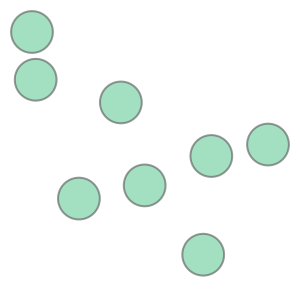

In [131]:
# Turn group of polygons into single multipolygon
my_union = fiftym_buffer.geometry.unary_union
print('Type:', type(my_union))

# Show the MultiPolygon object
my_union

In [132]:
#1 IS UPPER BY INDEX  # 0 IS CENTER ONE BY INDEX,#5 is lower one

# list_empty=[]
# for i in pump["Id"].to_list():
#     for j in range(0,len(deaths["geometry"])):
#         if my_union[i].contains(deaths["geometry"][j]) or my_union[i].intersects(deaths["geometry"][j])==True:
#             element=True
        
#         else:
#             element=False
        
#         list_empty.append(element) 

### Checking whether the Death Points fall in Buffer or Not.

In [133]:
list_=[str(i+1) if my_union[i].contains(deaths["geometry"][j]) or my_union[i].intersects(deaths["geometry"][j])==True 
       else str(0) for j in range(0,len(deaths["geometry"])) for i in range(0,len(pump["buffer_geometry"])) ]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  


### Shifting the columns 2 times right ward

In [134]:
new_df=pd.DataFrame(np.reshape(list_, (250, 8)))
deaths["Id_2"]=new_df.max(axis = 1)
death=deaths[["Count","Id_2"]].astype("int").groupby("Id_2").sum().reset_index().drop(0)
death["Id_2"]=[6,1,2]
death=death.rename(index={1:5,2:0,3:1}) #renaming the index

<h1 style="text-align:center;background-color:lightblue;border-radius: 100px;">Creating Submission:</h1>

In [135]:
sample=pd.read_csv("../input/cholera-deaths/sample.csv");
sample["Count"]=0

In [136]:
# from collections import Counter
# Counter(new_df[])

In [137]:
sample.update(death) #Updating the sample file filled with 
sample=sample.astype(int);sample=sample.set_index("Id_2")
# sample.drop(columns=["Id_2"],axis=1)
sample.to_csv("sample.csv")

In [138]:
sample

,Count
Id_2,
1,60
2,7
3,0
4,0
5,0
6,8
7,0
8,0


<h1 style="text-align:center;background-color:lightblue;border-radius: 100px;">Conclusions:</h1>

1. Our investigation shows the main source of cholera spread is Handpumps.
2. Houses in the center of map are most affected by this communicable disease.
3. Only 3 Places near handpumps got most of deaths as per the data.
4. Proximity analysis is the best tool to find points in between intersection of buffers

<h1 style="text-align:center;background-color:lightblue;border-radius: 100px;">References and Important Links:</h1>

1. https://shapely.readthedocs.io/en/stable/manual.html
2. https://geopandas.org/en/stable/
3. https://github.com/pysal/libpysal
4. https://www.kaggle.com/code/alexisbcook/proximity-analysis

> # For the Score .See the Leaderboard..........................
> 
<p style="text-align:center"><img src="https://c.tenor.com/-ynEKXsEuaEAAAAM/duracell-bunny.gif"></p>